In [98]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import tensorboard

import os
import matplotlib.pyplot as plt
import time
import copy
import numpy as np

# Downloading  and  preparing  CIFAR-10  dataset 

In [14]:
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#images, labels = next(iter(trainloader))

Files already downloaded and verified
Files already downloaded and verified


# Downloading AlexNet and adding fully connected layer

In [3]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained=True)
model.classifier[6] = nn.Linear(4096,10)
model.eval()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

Using cache found in C:\Users\andre/.cache\torch\hub\pytorch_vision_v0.9.0
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\andre/.cache\torch\hub\checkpoints\alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [15]:
model_2 = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.0001, momentum=0.9)

Using cache found in C:\Users\andre/.cache\torch\hub\pytorch_vision_v0.9.0


In [24]:
for param in model_2.parameters():
    param.requeires_grad = False
model_2.classifier[6] = nn.Linear(4096,10)

model_2.eval()
model_2.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Finetuning / Training

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
#         writer.add_scalar('Loss/train', loss.item(), i)
#         writer.add_scalar('Accuracy/train', correct/total, i)
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            print("Accuracy: ", correct/total)

print('Finished Training')

[1,  2000] loss: 2.302
Accuracy:  0.108125
[1,  4000] loss: 2.302
Accuracy:  0.104625
[1,  6000] loss: 2.302
Accuracy:  0.10845833333333334
[1,  8000] loss: 2.301
Accuracy:  0.1110625
[1, 10000] loss: 2.300
Accuracy:  0.124225
[1, 12000] loss: 2.297
Accuracy:  0.1338125
[2,  2000] loss: 2.277
Accuracy:  0.17375
[2,  4000] loss: 2.072
Accuracy:  0.2135625
[2,  6000] loss: 1.919
Accuracy:  0.24270833333333333
[2,  8000] loss: 1.810
Accuracy:  0.269375
[2, 10000] loss: 1.719
Accuracy:  0.2903
[2, 12000] loss: 1.651
Accuracy:  0.3071875
[3,  2000] loss: 1.592
Accuracy:  0.419375
[3,  4000] loss: 1.559
Accuracy:  0.4241875
[3,  6000] loss: 1.525
Accuracy:  0.43083333333333335
[3,  8000] loss: 1.499
Accuracy:  0.43484375
[3, 10000] loss: 1.464
Accuracy:  0.4422
[3, 12000] loss: 1.434
Accuracy:  0.4488333333333333
[4,  2000] loss: 1.401
Accuracy:  0.48975
[4,  4000] loss: 1.369
Accuracy:  0.4965625
[4,  6000] loss: 1.354
Accuracy:  0.5040833333333333
[4,  8000] loss: 1.352
Accuracy:  0.505812

# Training (Feature Extraction, only training last layer)

In [25]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_2(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
#         writer.add_scalar('Loss/train', loss.item(), i)
#         writer.add_scalar('Accuracy/train', correct/total, i)
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            print("Accuracy: ", correct/total)

print('Finished Training')

[1,  2000] loss: 1.267
Accuracy:  0.552625
[1,  4000] loss: 0.763
Accuracy:  0.6420625
[1,  6000] loss: 0.632
Accuracy:  0.6890416666666667
[1,  8000] loss: 0.578
Accuracy:  0.7175625
[1, 10000] loss: 0.520
Accuracy:  0.7381
[1, 12000] loss: 0.493
Accuracy:  0.7528541666666667
[2,  2000] loss: 0.427
Accuracy:  0.849625
[2,  4000] loss: 0.398
Accuracy:  0.855125
[2,  6000] loss: 0.385
Accuracy:  0.8594583333333333
[2,  8000] loss: 0.397
Accuracy:  0.86040625
[2, 10000] loss: 0.376
Accuracy:  0.8623
[2, 12000] loss: 0.364
Accuracy:  0.8644791666666667
[3,  2000] loss: 0.306
Accuracy:  0.8955
[3,  4000] loss: 0.292
Accuracy:  0.89575
[3,  6000] loss: 0.307
Accuracy:  0.8959583333333333
[3,  8000] loss: 0.294
Accuracy:  0.89690625
[3, 10000] loss: 0.288
Accuracy:  0.8975
[3, 12000] loss: 0.289
Accuracy:  0.8976666666666666
[4,  2000] loss: 0.230
Accuracy:  0.923875
[4,  4000] loss: 0.223
Accuracy:  0.92475
[4,  6000] loss: 0.225
Accuracy:  0.9236666666666666
[4,  8000] loss: 0.231
Accuracy

# Testing (on finetuned model)

In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        #images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


# Testing (AlexNet as Feature Extraction)

In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        #images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %


In [21]:
torch.save(model.state_dict(), "model.pt")

In [4]:
model.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

# Train on MNIST

In [83]:
learning_rate = 0.1e-2
batch_size_train = 64
batch_size_test = 1000


momentum = 0.5
epochs = 10
log_interval = 100

In [84]:
#MNIST
train_mnist = torchvision.datasets.MNIST('mnist/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))


test_mnist = torchvision.datasets.MNIST('mnist/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))

train_loader = torch.utils.data.DataLoader(train_mnist,batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_mnist,batch_size=batch_size_test, shuffle=True)


In [163]:
#SVHN
train_svhn = torchvision.datasets.SVHN('svhn/', split='train', download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                                torchvision.transforms.Grayscale(),
                                 torchvision.transforms.Resize((28,28)),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))


test_svhn = torchvision.datasets.SVHN('svhn/', split='test', download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             torchvision.transforms.Grayscale(),
                              torchvision.transforms.Resize((28,28)),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))

train_svhn_loader = torch.utils.data.DataLoader(train_svhn,batch_size=64, shuffle=True)
test_svhn_loader = torch.utils.data.DataLoader(test_svhn,batch_size=1000, shuffle=True)



Using downloaded and verified file: svhn/train_32x32.mat
Using downloaded and verified file: svhn/test_32x32.mat


In [123]:
train_features, train_labels = next(iter(train_loader))
test_features, test_labels = next(iter(test_loader))

In [124]:
print(train_features[0].shape)

torch.Size([1, 28, 28])


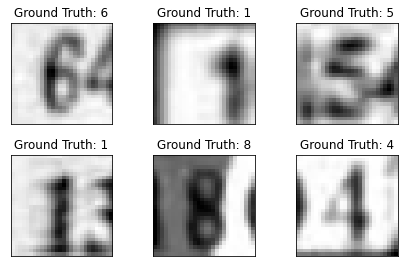

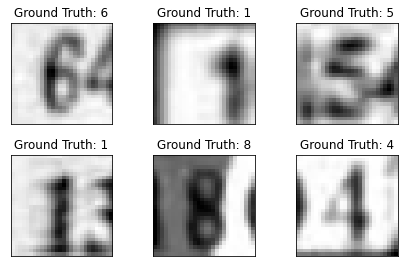

In [164]:
import matplotlib.pyplot as plt

examples = enumerate(test_svhn_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [125]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,kernel_size = 5,stride = 1,padding=2)
        self.avgPool = nn.AvgPool2d(kernel_size = 2,stride=2)
        self.conv2 = nn.Conv2d(6,16,kernel_size = 5,stride=1)
        self.conv3 = nn.Conv2d(16,120,kernel_size = 5,stride=1)

        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,10)
        

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.avgPool(x)
        
        x = F.tanh(self.conv2(x))
        x = self.avgPool(x)
        
        x = F.tanh(self.conv3(x))
        
        x = x.view(-1,120)
        
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        
        return F.log_softmax(x)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
mnist_model = Mnist_model()



In [126]:
optimizer = optim.SGD(mnist_model.parameters(), lr=learning_rate,
                      momentum=momentum)

In [127]:
def load_model(filename):
    model = Mnist_model()
    model.load_state_dict(torch.load(filename))
    model.eval()
    return model

In [182]:
def load_optimizer(model,filename,learning_rate, momentum):
    opt = optim.SGD(model.parameters(),lr=learning_rate,momentum=momentum)
    opt.load_state_dict(torch.load(filename))
    return opt

In [168]:
train_losses = []
train_counter = []
writer = SummaryWriter()
def train(epochs,network,train_loader,optimizer, filename="model.pth"):
    
    network.train()
    for epoch in range(epochs):
        
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(data)

            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()

            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
                train_losses.append(loss.item())
                train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

    torch.save(network.state_dict(), str('results/'+ filename))
    torch.save(optimizer.state_dict(), str('results/'+ "optimizer_" + filename))



In [169]:
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

def test(network,test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.cross_entropy(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_loss /= len(test_loader.dataset)
            test_losses.append(test_loss)
            
    print('\rTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)), end="\r")

In [171]:
train(epochs,mnist_model,train_loader,optimizer,"mnist_model.pth")

<ipython-input-125-9f487b786d10>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.121437
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.081174
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.004048
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.973738
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.920931
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.770432
Train Epoch: 0 [38400/60000 (64%)]	Loss: 1.748576
Train Epoch: 0 [44800/60000 (75%)]	Loss: 1.676574
Train Epoch: 0 [51200/60000 (85%)]	Loss: 1.567088
Train Epoch: 0 [57600/60000 (96%)]	Loss: 1.470178
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.461261
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.468510
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.313055
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.242304
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.332695
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.093024
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.107316
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.009749
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.998736
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.970531
Train Epoch:

In [173]:
test(mnist_model, test_loader)

<ipython-input-125-9f487b786d10>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test set: Avg. loss: 0.0324, Accuracy: 9120/10000 (91%)


90% accuracy on MNIST


## SVHN from pretrained MNIST model

In [174]:
pretrained_mnist = load_model('results/mnist_model.pth')

test(pretrained_mnist, test_svhn_loader)

<ipython-input-125-9f487b786d10>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test set: Avg. loss: 0.0065, Accuracy: 2357/26032 (9%)


## Transfer learning

In [184]:
transfer_mnist = load_model('results/mnist_model.pth')
svhn_optimizer = load_optimizer(transfer_mnist,'results/optimizer_mnist_model.pth',learning_rate,momentum)

train(epochs,transfer_mnist, train_svhn_loader, svhn_optimizer,'finetuned_mnist_model.pth')


<ipython-input-125-9f487b786d10>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/73257 (0%)]	Loss: 5.800743
Train Epoch: 0 [6400/73257 (9%)]	Loss: 2.803069
Train Epoch: 0 [12800/73257 (17%)]	Loss: 2.356941
Train Epoch: 0 [19200/73257 (26%)]	Loss: 2.329160
Train Epoch: 0 [25600/73257 (35%)]	Loss: 2.200252
Train Epoch: 0 [32000/73257 (44%)]	Loss: 2.275250
Train Epoch: 0 [38400/73257 (52%)]	Loss: 2.305744
Train Epoch: 0 [44800/73257 (61%)]	Loss: 2.090626
Train Epoch: 0 [51200/73257 (70%)]	Loss: 2.278731
Train Epoch: 0 [57600/73257 (79%)]	Loss: 2.200186
Train Epoch: 0 [64000/73257 (87%)]	Loss: 2.231621
Train Epoch: 0 [70400/73257 (96%)]	Loss: 2.176791
Train Epoch: 1 [0/73257 (0%)]	Loss: 2.208328
Train Epoch: 1 [6400/73257 (9%)]	Loss: 2.271117
Train Epoch: 1 [12800/73257 (17%)]	Loss: 2.063429
Train Epoch: 1 [19200/73257 (26%)]	Loss: 2.221268
Train Epoch: 1 [25600/73257 (35%)]	Loss: 2.255403
Train Epoch: 1 [32000/73257 (44%)]	Loss: 2.259790
Train Epoch: 1 [38400/73257 (52%)]	Loss: 2.248225
Train Epoch: 1 [44800/73257 (61%)]	Loss: 2.197451
Train Epoch: 1

NameError: name 'svhn_model' is not defined

In [186]:
test_svhn = load_model('results/finetuned_mnist_model.pth')
test(test_svhn, test_svhn_loader)

<ipython-input-125-9f487b786d10>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test set: Avg. loss: 0.0022, Accuracy: 10065/26032 (39%)
